# Practical introduction to Neural Networks
#Author : Geoffrey ROMAN-JIMENEZ (PhD)
#email : grj@mailoo.org
#Date : around feb. 2019 
```
Copyright 2019 G. ROMAN-JIMENEZ

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
```

--------------------------------------



Hello folks. 

Here is a small course that -- I hope -- will help any beginner to understand and practice the foundations and bases of **Artificial Neural Network (ANN)**. 
It can be view as an introduction to deep learning, but it has been originally set to understand the "learning" part of ANN more **deeply**. 

Therefore, instead of using any of the deep-learning framework available out there, I wanted this course to be based only on the library **numpy** (and **matplotlib** to plot stuffs (^o^)/ ). In that way, it will force you to code everything from *scratch*. 
My stand is, **to understand it: you need to practice it**.

Please note that  I won't push any mathematical proof in this notebook, the definition and algorithm will be given **as it is**. However, once you will understand how it works, I would warmly recommend you to go check some mathematical proofs :)

Hope you'll like it.

Geo.

In [1]:
###############################
#### LIBRARIES IMPORTATION ####
###############################
# We'll use only numpy and matplotlib 
#    (\______/)
#    ( ͡° ͜ ʖ ͡°)
#     \╭☞   \╭☞
import numpy as np 
import matplotlib.pyplot as plt

## 1. A simple linear classification problem 

Let's start with a very simple case.

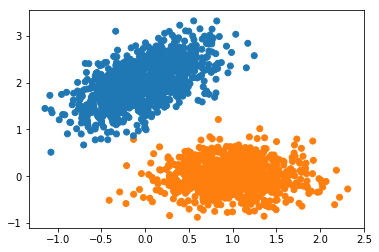

In [2]:
###############################
####### LOADING DATASET #######
###############################
# Let's load a given dataset
with np.load('sd.npz') as data:
    X = data['X']
    C = data['C']
# and plot the dots
randomize = np.arange(len(X))
np.random.shuffle(randomize)
X = X[randomize]
C = C[randomize]
plt.scatter(X[:,0], X[:,1], c=['tab:orange' if p>=0.5 else "tab:blue" for p in C ])
plt.show()

We have <font color=orange>orange</font> and <font color=blue>blue</font> dots.

- dots' coordinates are in X
- dots' color are in C

Now let's imaging we have new dots ... but DO NOT have the colors

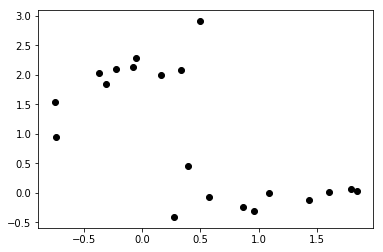

In [3]:
with np.load('sd_nocolor.npz') as data:
    Xnew = data['X']
    Cnew = data['C']
Cnew = None # [colors] ╯°_°）╯︵ [sɹoloɔ] ... oups .... we just lost our colors 
plt.scatter(Xnew[:,0], Xnew[:,1], c="black")
plt.show()

Here, we want to find the color for each of these new dots -> a **simple linear classifier** will do the job :)

So let's learn to automatically colorify these dots using our already-well-colored-dataset, using a simple *Artificial Neuron* !

but FIRST:

**Questions** : 
- What are my inputs? 
- What are my outputs?

**Answer**:
- The inputs are my dots
- The outputs are my colors

**We're now ready for science!**

Let's take a look of what Artificial Neuron (AN) corresponds to.


An AN is defined as : <img src="./img/AN.png" width="300" />

$$ y = \varphi \Bigg( 
\begin{bmatrix} x_{1}    &   x_{2} \\ \end{bmatrix}. \begin{bmatrix} w_1 \\ w_2 \end{bmatrix} +b\Bigg)
$$

which can be written in a more simplified way:

$$ y = \varphi \Bigg( 
\mathbf{x}^T. W +b\Bigg)
$$


- $\mathbf{x}=\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$  is the input (a dot is defined by its two coordinates $x_1$ and $x_2$)
- $y$ is the output of the AN
- $W$ and $b$ are the weights and the bias of the AN, that will transform our input.
- $\varphi(.) $ is a non-linear function that will place our output in a domain that we want. 

```
Note : the non-linear function is useful for other reasons than placing our output in a wanted domain, but let's forget about it for now
```

But in our context, what do want to do with that ???

We want our AN to answer $y=1$, if the input dot $\mathbf{x}$ is supposed to be **<font color=orange>Orange</font>**. 
Conversely, we want our AN to answer $y=0$, if the input dot $\mathbf{x}$ is supposed to be **<font color=blue>Blue</font>**. 

### Let's create an AN \o/ !

To do so, first, we need a bias $b$ and weigths $W$


In [4]:
#We don't know the values so we'll put random numbers 
#(that's an effective rule-of-thumb in machine-learning by the way)
b = np.random.normal(size=1) # that's the bias
print("b:", b)
W = np.random.normal(size=2) # that's the weights
print("W:", W)

b: [-0.57696147]
W: [ 1.54990084 -0.95827827]


We also need a non-linear function $\varphi(.) $.

For these experimentations, since we only consider a linear classification, I will use the *insanely-cool-but-sadly-never-used-nowadays* **heaviside** function !

$$\varphi(x) =   \begin{cases}
    \scriptstyle 0  & if x<0.\\
    \scriptstyle 1  & if x \geq 0.
  \end{cases}  $$
  

**note**: with a heaviside function, our AN is actually a **Perceptron** (invented by **Rosenbalt**, "Widrow" and "Hoff" in the early 60s!)

<img src="./img/nn_timeline_perceptron.png" width="500" />

In [5]:
# definition of the non-linear heaviside function
def heaviside(x):
    return 1 if x>=0 else 0

Let's compute the output $y$, from a $x$ for which I know the answer (the color $c$). 

In [6]:
x = X[0]
y = heaviside(np.dot(x, W)+b)
print(x, y, C[0])
#y1 = nl_sigmoid(l1)

[0.83090609 0.62260692] 1 1.0


Hum ok... what about all my data?

In [7]:
# let's compute the number of error
n_error = 0
for n in range(len(X)):
    x = X[n]
    y = heaviside(np.dot(x, W)+b)
    # add 1 each time the output is not what I expected
    if C[n] != y:
        n_error += 1
print("Number of ill-classified dots:", n_error)
# ploting percentage is way more cool
print("percentage of error:", 100*n_error/len(X), "%")

Number of ill-classified dots: 82
percentage of error: 4.1 %


For the moment, our AN give me random answer... 

**Let's train it !**

### Train a perceptron
Training an Perceptron is very simple.

> For each couple of *dot*/*color* ($\mathbf{x}$, $c$) of our dataset :
>> 1. We compute the output of our AN:
$$y = \varphi ( W.\mathbf{x} +b )$$
>> 2. we update the weights
    >>> if $y=0$ and $c=1$:
     $$ W = W + \mathbf{x} $$
     $$ b = b +1 $$
    >>> else if $y=1$ and $c=0$:
     $$ W = W - \mathbf{x} $$
     $$ b = b - 1 $$
     
So Each time the AN makes a mistake, I add or substract the input $x$ to the weight $W$ (and 1 to the bias). It should be easy to implement :D

BUT before we start, in order to be more generalizable (because science!) let's just modify our algorithm a bit:

> For each couple of *dot*/*color* ($\mathbf{x}$, $c$) of our dataset :
>> 1. We compute the output of our AN:
$$y = \varphi ( W.\mathbf{x} +b )$$
>> 2. We measure the error between the *expected output* $c$ and $y$:
$$ \mathcal{E} = c - y $$
>> 3. we update the weights: 
     $$ W = W + \mathbf{x} . \mathcal{E} $$
     $$ b = b + \mathcal{E} $$ 
     
```  
Note: This algorithm is strictly equivalent to the first one. 
```

In [8]:
n_error = 0
# for every dot of X
for n in range(len(X)):
    # we compute the output y
    y = heaviside(np.dot(X[n], W)+b) 
    # we measure the error
    error = C[n] - y
    # we update the weights
    W += X[n]*error
    # we update the bias
    b += error
    
    # For monitoring, add the error squared (if error = -1 or 1, n_error+=1)
    n_error += error**2
    # print the error and weigths to see if we're making any progress 
    if error !=0:
        print("Error found:", n)
        print("\t", "error:", error)
        print("\t updated W and b:", W, b)

Error found: 32
	 error: 1.0
	 updated W and b: [ 1.69659925 -1.11934788] [0.42303853]
Error found: 682
	 error: 1.0
	 updated W and b: [ 1.48411103 -0.89480356] [1.42303853]
Error found: 686
	 error: -1.0
	 updated W and b: [ 0.89843038 -3.43056694] [0.42303853]
Error found: 712
	 error: 1.0
	 updated W and b: [ 1.32583986 -3.03096133] [1.42303853]
Error found: 950
	 error: 1.0
	 updated W and b: [ 1.96385103 -2.2569408 ] [2.42303853]
Error found: 1471
	 error: -1.0
	 updated W and b: [ 1.96726091 -3.31489048] [1.42303853]
Error found: 1511
	 error: 1.0
	 updated W and b: [ 1.8342222  -2.52788368] [2.42303853]


In [9]:
# W and b have been updated across time... 
# Let's measure our error rate to see if the AN is making less error
n_error = 0
for n in range(len(X)):
    x = X[n]
    y = heaviside(np.dot(x, W)+b)
    if C[n] != y:
        n_error += 1
print("Number of ill-classified dots:", n_error)
print("percentage of error:", 100*n_error/len(X), "%")

Number of ill-classified dots: 0
percentage of error: 0.0 %


### Okay... 

Soooo it works! we have less errors! 

In case of remaining error, we can realize that our AN learned on all our dots... but it only saw each dot once!
    
```
Note: sometimes, depending on our random initialization, 
there are some remaining errors (sometimes don't). 
```

Let's use **Epochs** !

```
Note : One Epoch is when an ENTIRE dataset is passed forward and backward 
through the neural network.
```


In [10]:
#b = np.random.normal(size=1)
#W = np.random.normal(size=2)
n_epoch = 100 # my AN will learn by possibly seeing the dataset 100 times !!! for the sake of science 
randomize = np.arange(len(X))

for e in range(n_epoch):
    n_error = 0
    for n in range(len(X)):
        # we compute the output y
        y = heaviside(np.dot(X[n], W)+b) 
        # we measure the error
        error = C[n] - y
        # we update the weights
        W += X[n]*error
        # we update the bias
        b += error
        if error != 0:
            n_error += 1
    print("epoch:", e, "percentage of error:", 100*n_error/len(X), "%")
    
    # Here is a meta-rule
    ## in any case, stop the run of epochs if every point in well classified
    ### to save some computation time
    if n_error/len(X) == 0:
        break
        

epoch: 0 percentage of error: 0.0 %


### 0 errors! (•̀ᴗ•́)و ̑̑
#### That's what we were looking for !

Basically it means that, on our training dataset, the AN is always giving the correct color

Let's find the colors for the dots with no color!


In [11]:
# let's find the colors for the new dots!
pred_C = []
for n in range(len(Xnew)):
    y = heaviside(np.dot(Xnew[n], W)+b) 
    pred_C.append(y)
pred_color = ["tab:orange" if p>0 else "tab:blue" for p in pred_C ]

# in parallel, let's also check out the learned colors
learned_C = []
for n in range(len(X)):
    y = heaviside(np.dot(X[n], W)+b) 
    learned_C.append(y)
learned_color = ["tab:orange" if p>0 else "tab:blue" for p in learned_C ]


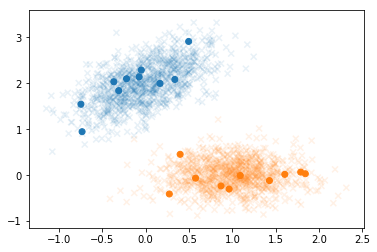

In [12]:
# plots the predicted colors
plt.scatter(Xnew[:,0], Xnew[:,1], c=pred_color)
# plots the learned colors (in transparency)
plt.scatter(X[:,0], X[:,1], marker='x' ,c=learned_color, alpha=0.1)
plt.show()

#### ( •_•)
## ( •_•)>⌐■-■
# (⌐■_■) #Yeeeaaahhh


# Notes :

- The learning algorithm for perceptron is guaranteed to find the combination of weights that get the right answer for every inputs of the dataset used for training... **if such weights exists**


- **Sometimes**, especially when the problem is to simple, the initialization give a perfect score with our dataset : our AN has nothing to learn ! (TGTF : Too good to fail!)
---------------------------------




## 2. A more complex problem : XOR

In [13]:
# Let's generate a more complex dataset 
def cd_generator(n=[1000, 1000, 1000, 1000]):
    n_blue1 = n[0]
    n_blue2 = n[1]
    blue_u1 = (10, 10)
    blue_u2 = (0, 0)
    blue_s1 = [[1, 0], [0, 1]]
    blue_s2 = [[1, 0], [0, 1]]
    x_blue = np.concatenate( ( np.random.multivariate_normal(blue_u1, blue_s1, (n_blue1)), np.random.multivariate_normal(blue_u2, blue_s2, (n_blue2))), axis=0)
    y_blue = np.zeros(len(x_blue))

    n_orange1 = n[2]
    n_orange2 = n[3]
    orange_u1 = (10, 0)
    orange_u2 = (0, 10)
    orange_s1 = [[1, 0], [0, 1]]
    orange_s2 = [[1, 0], [0, 1]]
    x_orange = np.concatenate( ( np.random.multivariate_normal(orange_u1, orange_s1, (n_orange1)), np.random.multivariate_normal(orange_u2, orange_s2, (n_orange2))), axis=0)
    y_orange = np.ones(len(x_orange))

    X = np.concatenate((x_blue, x_orange),axis=0)
    #X = (X - np.mean(X)) / np.std(X)
    Y = np.concatenate((y_blue, y_orange), axis=0)

    ## Lets randomize a bit ...
    randomize = np.arange(len(X))
    np.random.shuffle(randomize)
    X = X[randomize]
    Y = Y[randomize]

    ## resizing of Y to fit with our network 
    Y = np.expand_dims(Y, axis=1)
    return X, Y

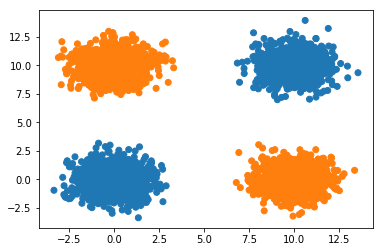

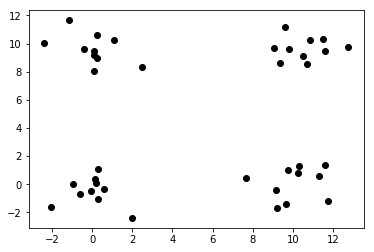

In [14]:
# our training dataset
X, C = cd_generator()
plt.scatter(X[:,0], X[:,1], c=['tab:orange' if p>=0.5 else "tab:blue" for p in C ])
plt.show()

# our test dataset 
Xnew, Cnew = cd_generator(n=[10,10,10,10])
plt.scatter(Xnew[:,0], Xnew[:,1], c="black")
plt.show()

<img src="https://i.imgflip.com/2tkhgb.jpg" width=500/>

## The XOR problem!

Here is the famous XOR problem, which signed the beginning of the AI winter 

<img src="./img/nn_timeline_xor.png" width="500" />

The problem is quite simple to understand: one perceptron won't be able to learn how to give the correct answers! 

### let's prove it by using our own code :)


In [15]:
# we create a perceptron
b = np.random.normal(size=1)
print("b:", b)
W = np.random.normal(size=2)
print("W:", W)

# we train it on our dataset
n_error = 0
n_epoch = 10
for e in range(n_epoch):
    n_error = 0
    for n in range(len(X)):
        y = heaviside(np.dot(X[n], W)+b) 
        error = C[n] - y
        W += X[n]*error
        b += error
        if error != 0:
            n_error += 1
    print("epoch:", e, "percentage of error:", 100*n_error/len(X), "%")
    if n_error/len(X) == 0:
        break
        

b: [0.28898889]
W: [0.27653718 0.58558879]
epoch: 0 percentage of error: 46.9 %
epoch: 1 percentage of error: 46.3 %
epoch: 2 percentage of error: 46.525 %
epoch: 3 percentage of error: 46.15 %
epoch: 4 percentage of error: 46.625 %
epoch: 5 percentage of error: 46.35 %
epoch: 6 percentage of error: 47.35 %
epoch: 7 percentage of error: 47.55 %
epoch: 8 percentage of error: 45.85 %
epoch: 9 percentage of error: 47.025 %


We are clearly not making any progress ...

100, 1000, 100000 epochs won't change anything. 

The problem is clearly that our AN is making a linear separation on our domain... where two separations are clearly needed!

-----------------------------





##### - $1^{st}$ solution : The kernel trick

Here come the base of the **SVM**, the absolutely fantastic **kernel trick** ! 

<img src="./nn_timeline_svm.png" width="500" />


The main idea of the Kernel Trick is to make a linear separation on a transformed spaces. 

For instance, instead of taking out input dots as is, we:

1. Transform them to suit with a simple linear classification problem
2. Classify them with our already-implemented algorithm !

For our experimentations, we will consider the following transformation : 

   1.a. We normalize our dataset $X$ 

$$ X_{norm} = \frac{X - µ_X}{\sigma_{X}} $$

1.b. We create a new dataset $Z$, by transforming each dots $\mathbf{x}$ of the dataset $X_norm$ as :
$$ z = x_1 . x_2 $$


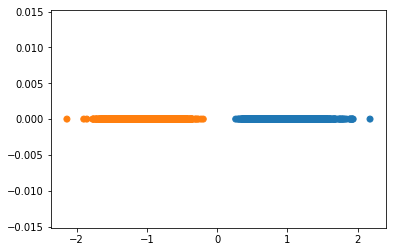

In [16]:
# Let's do that
X_norm = (X - np.mean(X)) / np.std(X)
Z = []
for n in range(len(X)):
    z = X_norm[n][0]*X_norm[n][1]
    Z.append(z)

# and plot it !
plt.scatter(Z, np.zeros(len(Z)), c=['tab:orange' if p>=0.5 else "tab:blue" for p in C ])
plt.show()

2. Classify the new dataset $Z$

With $Z$, it seems clear that our AN will do the job :)

-> Let's try!

In [17]:
# We re-take our algorithm

# we create a perceptron
b = np.random.normal(size=1)
print("b:", b)
W = np.random.normal(size=1)
print("W:", W)


# we train it on the Z dataset
n_error = 0
n_epoch = 100
for e in range(n_epoch):
    n_error = 0
    for n in range(len(Z)):
        z = Z[n]
        y = heaviside(z*W+b) 
        error = C[n] - y
        W += z*error
        b += error
        if error != 0:
            n_error += 1
    print("epoch:", e, "percentage of error:", 100*n_error/len(Z), "%")
    if n_error/len(Z) == 0:
        break

b: [2.22463693]
W: [-0.95652831]
epoch: 0 percentage of error: 0.05 %
epoch: 1 percentage of error: 0.0 %


<img src="https://i.imgflip.com/2tki4f.jpg" width="500" />


In [18]:
# let's predict the colors for the new dots!
Xnew_norm = (Xnew - np.mean(Xnew)) / np.std(Xnew)

Znew = []
for n in range(len(Xnew_norm)):
    z = Xnew_norm[n][0]*Xnew_norm[n][1]
    Znew.append(z)
    
pred_C = []
for n in range(len(Znew)):
    y = heaviside(np.dot(Znew[n], W)+b) 
    pred_C.append(y)
pred_color = ["tab:orange" if p>0 else "tab:blue" for p in pred_C ]

learned_C = []
for n in range(len(Z)):
    y = heaviside(np.dot(Z[n], W)+b) 
    learned_C.append(y)
learned_color = ["tab:orange" if p>0 else "tab:blue" for p in learned_C ]

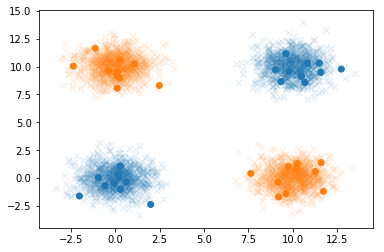

In [19]:
# plots the predicted colors
plt.scatter(Xnew[:,0], Xnew[:,1], c=pred_color)
# plots the learned colors (in transparency)
plt.scatter(X[:,0], X[:,1], marker='x' ,c=learned_color, alpha=0.1)
plt.show()

##### We did it ! 
So it was possible using one Perceptron after all 

**Main drawback** : we need to know the transformation $T: X \rightarrow Z$

--------------------------

## 1-layer neural network 

Finally !


### Okay ....
So now we want to classify these dots using a network of neurons. To do so, a 1-hidden layer composed of 2 AN will do the job. 

So what is a 1-hidden layer composed of 2-AN? 

### Architecture:

<img src="./img/1lnn.png" width="500" />

```
Nice picture to get the architecture.... 
but not really helpful to really understand what do we need to do. 
('cause we DO want to code it ! )
```
Here the output $y$ is computed through the outputs of three neurons $h_1$ and $h_2$

$$  y =
\varphi \Bigg( 
\begin{bmatrix}
w_{out_1} & w_{out_2}     \\ 
\end{bmatrix}.
\varphi \Bigg( 
\begin{bmatrix}
w_{in(1,1)} & w_{in(1,2)}      \\
w_{in(2,1)} & w_{in(2,2)}      \\
\end{bmatrix}.
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}  + 
\begin{bmatrix} b_1 \\ b_2 \end{bmatrix} 
\Bigg)+ b 
\Bigg) $$

So we have : 

- input weights $W_{in}$ (2x2 matrix) and bias $b_{in}$ (vector of 2 scalars)
- output weights $W_{out}$ (2x1 matrix) and bias $b_{out}$ (1 scalar)

### Let's create it !

In [20]:
# my 1-layer neural network
## I want 2 neurons
n_neurons = 2 
## generate the weights and bias that will digest our inputs
W_in = np.random.random((2,n_neurons)) 
b_in = np.random.random(n_neurons)
print("W_in: \n", W_in)
print("b_in: \n", b_in)
## generate the weights and bias that will spit the output 
W_out = np.random.random((n_neurons,1))
b_out = np.random.random(1)
print("W_out: \n", W_out)
print("b_out: \n", b_out)


W_in: 
 [[0.5977618  0.66689771]
 [0.75880102 0.58024882]]
b_in: 
 [0.54140122 0.05486685]
W_out: 
 [[0.34686883]
 [0.52354467]]
b_out: 
 [0.16262826]


### The sigmoid non-linear function:
For these experiments, we define a brand-new badass non-linear function $\varphi$ : the **sigmoid** function !

$$\varphi(x) = \frac{1}{1+e^{-x}}$$

There are several reasons for the use of this function. But for now, let just consider that it have a continuous derivative that will be useful for the learning procedure that we'll see later. 

Its derivative is very simple:
$$\varphi'(x) = \varphi(x) . (1-\varphi(x))$$



In [21]:
# definition of the sigmoid function (with its derivative!)
def sigmoid(x, derivative=False):
    y = 1/(1+np.exp(-x))
    if derivative == True:
        return y * (1-y)
    return y


### Learning procedure:
We define our learning algorithm as follows :

> For each couple of *dot*/*color* ($\mathbf{x}$, $c$) of our dataset :
>> 1. We compute the output of our AN:
$$s_{in} = W_{in}.\mathbf{x} +b_{in} $$
$$h = \varphi ( s_{in}  ) $$
$$s_{out} = W_{out}.\mathbf{x} +b_{out} $$
$$y = \varphi ( s_{out} ) $$
>> 2. We measure the error between the *expected output* $c$ and $y$:
$$ \mathcal{E} = c - y $$
>> 3. We compute the error due to the weights
$$ \delta_{out} = \mathcal{E} \times \varphi'(s_{out}) $$
$$ \delta_{in} = \delta_{out}^T.W_{out}  \times \varphi'(s_{in}) $$
>> 3. we update the weights:       
$$ W_{out} =  W_{out} + h^T. \delta_{out} $$
$$ b_{out} =  b_{out} + \delta_{out} $$
$$ W_{in}  =  W_{in}  + x^T . \delta_{in} $$
$$ b_{in}  =  b_{in}  + \delta_{in} $$

```
This learning procedure is called Gradient Descent. 
It's very related to our first learning algorithm, 
BUT this time we take into account the "amount" of error (called delta)
and modify the weight according to this.
    - previously the error was either -1 or 1
    - now the error is between -1 and 1 !
```

-> Let's implement that

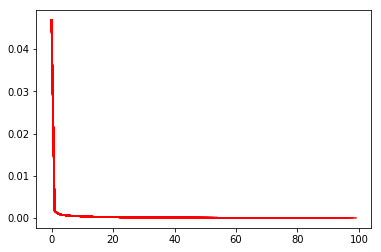

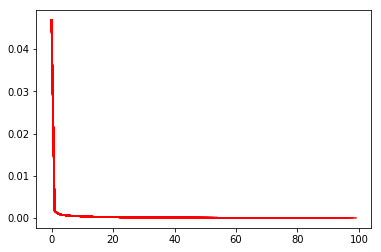

In [74]:
from IPython.display import display, clear_output

# An important step here : 
## We normalize the data : (x-µ)/s
## normalization will always help the algorithm to learn 
X_norm = (X - np.mean(X)) / np.std(X)
Xnew_norm = (Xnew - np.mean(Xnew)) / np.std(Xnew)

learning_rate = 1
n_epoch = 100
l_epoch = []

# to plot the error
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 

for e in range(n_epoch):
    error_rate = 0
    for n in range(len(X)):
        x = X_norm[n]
        x = np.expand_dims(x, axis=0) # a little trick here
        # we compute the outputs of the first layer
        l_in = np.dot(x, W_in)+b_in
        ## and compute their activation 
        h = sigmoid(l_in) 
        # we compute the output s of the last layer
        l_out = np.dot(h, W_out)+b_out
        ## and the activation of the output neuron (out output y)
        y = sigmoid(l_out)
        # we compute the error
        error = C[n] - y
        error_rate += error**2
        # we compute the delta for each layer
        ## first the delta between 
        y_delta = error * sigmoid(l_out, derivative=True) 
        h_delta = np.dot(y_delta,W_out.T) * sigmoid(l_in, derivative=True)
        W_out += learning_rate * np.dot(h.T, y_delta)
        b_out += learning_rate * y_delta.squeeze()
        W_in += learning_rate * np.dot(x.T, h_delta)
        b_in += learning_rate * h_delta.squeeze()

    l_epoch.append(error_rate.squeeze()/len(X))
    clear_output(wait = True)
    #plt.pause(0.5)
    ax.plot(range(e+1), l_epoch, c="r")
    display(fig)

    if e%10 == 0:
        print("epoch:", e, "error:", error_rate/len(X))
    else :
        print("epoch:", e, "error:", error_rate/len(X), end="\r")
        

## The loss is getting lower and lower ＼(-o-)／

```
Note that it never reach the 0... It's due to the sigmoid function. 
Indeed the sigmoid function reach: 
                                    - 0 when x -> -∞ 
                                    - 1 when x -> ∞
Such values do not exist in our numerical computation. 
``` 


To get our predicted colors :

- if $y\geq0.5$, the predicted color is **<font color=orange>Orange</font>**. 
- if $y<0.5$, the predicted color is **<font color=blue>Blue</font>**. 


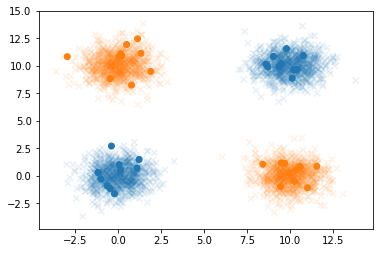

In [75]:
pred_C = []
for n in range(len(Xnew)):
    x = Xnew_norm[n]
    h = sigmoid(np.dot(x, W_in)+b_in)
    y = sigmoid(np.dot(h, W_out)+b_out)
    pred_C.append(y)
pred_color = ["tab:orange" if p>=0.5 else "tab:blue" for p in pred_C ]


learned_C = []
for n in range(len(X)):
    x = X_norm[n]
    h = sigmoid(np.dot(x, W_in)+b_in)
    y = sigmoid(np.dot(h, W_out)+b_out)
    learned_C.append(y)
learned_color = ["tab:orange" if p>=0.5 else "tab:blue" for p in learned_C ]

plt.scatter(Xnew[:,0], Xnew[:,1] ,c=pred_color)
plt.scatter(X[:,0], X[:,1], marker='x' ,c=learned_color, alpha=0.1)
plt.show()

# We just implement our first NN
<img src="https://s-media-cache-ak0.pinimg.com/564x/18/99/d2/1899d2b4a5532cb7b9ea862659ce5815.jpg" width=500>


# Let's try with a more tricky problem

In [23]:
def vcd_generator(n=[1000, 1000, 1000, 1000]):
    n_blue1 = n[0]
    n_blue2 = n[1]
    blue_u1 = (5, 5)
    blue_u2 = (0, 0)
    blue_s1 = [[1.5, 0], [0, 1.5]]
    blue_s2 = [[1.5, 0], [0, 1.5]]
    a = np.random.multivariate_normal(blue_u1, blue_s1, (n_blue1))
    a = np.array([x  for x in a if (2.5 <= x[0] < 7.5) and (2.5 <= x[1] < 7.5) ])
    b = np.random.multivariate_normal(blue_u2, blue_s2, (n_blue2))
    b = np.array([x  for x in b if (-2.5 <= x[0] < 2.5) and (-2.5 <= x[1] < 2.5) ])
    
    x_blue = np.concatenate( ( a , b ) , axis=0 )
    y_blue = np.zeros(len(x_blue))

    n_orange1 = n[2]
    n_orange2 = n[3]
    orange_u1 = (5, 0)
    orange_u2 = (0, 5)
    orange_s1 = [[1.5, 0], [0, 1.5]]
    orange_s2 = [[1.5, 0], [0, 1.5]]
    c = np.random.multivariate_normal(orange_u1, orange_s1, (n_orange1))
    c = np.array([x  for x in c if (2.5 <= x[0] < 7.5) and (-2.5 <= x[1] < 2.5) ])
    d = np.random.multivariate_normal(orange_u2, orange_s2, (n_orange2))
    d = np.array([x  for x in d if (-2.5 <= x[0] < 2.5) and (2.5 <= x[1] < 7.5) ])
    x_orange = np.concatenate( ( c, d ), axis=0)
    y_orange = np.ones(len(x_orange))

    X = np.concatenate((x_blue, x_orange),axis=0)
    #X = (X - np.mean(X)) / np.std(X)
    Y = np.concatenate((y_blue, y_orange), axis=0)

    ## Lets randomize a bit ...
    randomize = np.arange(len(X))
    np.random.shuffle(randomize)
    X = X[randomize]
    Y = Y[randomize]

    ## resizing of Y to fit with our network 
    Y = np.expand_dims(Y, axis=1)
    return X, Y

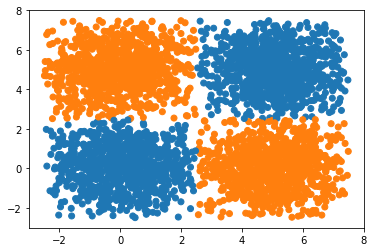

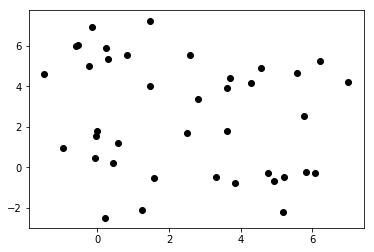

In [24]:
# our training dataset
X, C = vcd_generator()
plt.scatter(X[:,0], X[:,1], c=['tab:orange' if p>=0.5 else "tab:blue" for p in C ])
plt.show()

# our test dataset 
Xnew, Cnew = vcd_generator(n=[10,10,10,10])
plt.scatter(Xnew[:,0], Xnew[:,1], c="black")
plt.show()

### We can feel that is gonna be complicated... 




In [25]:
# my 1-layer neural network
n_neurons = 2
W_in = np.random.random((2,n_neurons)) 
b_in = np.random.random(n_neurons)

W_out = np.random.random((n_neurons,1))
b_out = np.random.random(1)


# normalization of the data
X_norm = (X - np.mean(X)) / np.std(X)
Xnew_norm = (Xnew - np.mean(Xnew)) / np.std(Xnew)

n_epoch = 100
for e in range(n_epoch):
    error_rate = 0
    for n in range(len(X)):
        x = X_norm[n]
        x = np.expand_dims(x, axis=0) # a little trick here
        # we compute the outputs of the first layer
        l_in = np.dot(x, W_in)+b_in
        ## and compute their activation 
        h = sigmoid(l_in) 
        # we compute the output s of the last layer
        l_out = np.dot(h, W_out)+b_out
        ## and the activation of the output neuron (out output y)
        y = sigmoid(l_out)
        # we compute the error
        error = C[n] - y
        error_rate += error**2
        # we compute the delta for each layer
        ## first the delta between 
        y_delta = error * sigmoid(l_out, derivative=True) 
        h_delta = np.dot(y_delta,W_out.T) * sigmoid(l_in, derivative=True)
        W_out += np.dot(h.T, y_delta)
        b_out += y_delta.squeeze()
        W_in += np.dot(x.T, h_delta)
        b_in += h_delta.squeeze()
        
    if e%10 == 0:
        print("epoch:", e, "error:", error_rate/len(X))
    else :
        print("epoch:", e, "error:", error_rate/len(X), end="\r")

epoch: 0 error: [[0.09969593]]
epoch: 10 error: [[0.0640602]]
epoch: 20 error: [[0.06396711]]
epoch: 30 error: [[0.06394279]] 22 error: [[0.06395922]]
epoch: 40 error: [[0.06393932]] 36 error: [[0.06393953]]
epoch: 50 error: [[0.06394179]] 47 error: [[0.06394078]]
epoch: 60 error: [[0.06394582]]
epoch: 70 error: [[0.0639501]]]
epoch: 80 error: [[0.06395414]] 72 error: [[0.06395094]] 77 error: [[0.06395297]]
epoch: 90 error: [[0.06395777]]


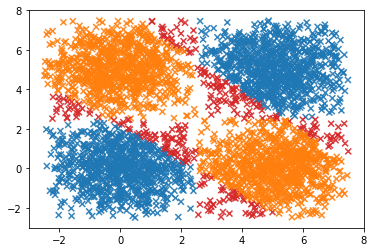

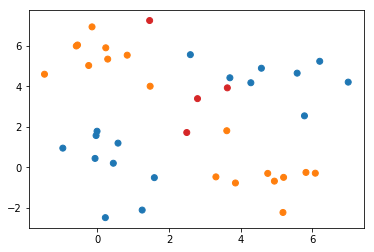

In [26]:
pred_C = []
for n in range(len(Xnew)):
    x = Xnew_norm[n]
    h = sigmoid(np.dot(x, W_in)+b_in)
    y = sigmoid(np.dot(h, W_out)+b_out)
    pred_C.append(y)
pred_color = ["tab:orange" if p>=0.5 else "tab:blue" for p in pred_C ]
# this is for printing errors in red
rw_pred_color = [pc if int(p>=0.5) == c  else "tab:red" for pc, p, c in zip(pred_color, pred_C, Cnew) ]

learned_C = []
for n in range(len(X)):
    x = X_norm[n]
    h = sigmoid(np.dot(x, W_in)+b_in)
    y = sigmoid(np.dot(h, W_out)+b_out)
    learned_C.append(y)
learned_color = ["tab:orange" if p>=0.5 else "tab:blue" for p in learned_C ]
# this is for printing errors in red
rw_learned_color = [pc if int(p>=0.5) == c else "tab:red" for pc, p, c in zip(learned_color, learned_C, C) ]

plt.scatter(X[:,0], X[:,1], marker='x' ,c=rw_learned_color, alpha=0.9)
plt.show()
plt.scatter(Xnew[:,0], Xnew[:,1] ,c=rw_pred_color)
plt.show()

not successful with 2 neurons.

Let's put more of them !

epoch: 0 error: [[0.13092879]]
epoch: 9 error: [[0.01777662]] 8 error: [[0.0194846]] 10 error: [[0.01725561]]
epoch: 20 error: [[0.01473417]] 13 error: [[0.01605157]]
epoch: 30 error: [[0.01332645]]
epoch: 40 error: [[0.01205193]]
epoch: 50 error: [[0.01113483]]
epoch: 60 error: [[0.01014651]]
epoch: 70 error: [[0.00931943]]
epoch: 80 error: [[0.00891078]]
epoch: 90 error: [[0.00840444]] 87 error: [[0.00877993]]


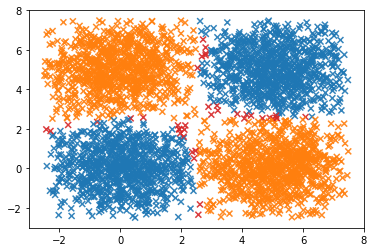

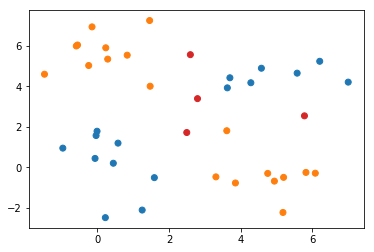

In [27]:
# my 1-layer neural network
n_neurons = 10
W_in = np.random.random((2,n_neurons)) 
b_in = np.random.random(n_neurons)

W_out = np.random.random((n_neurons,1))
b_out = np.random.random(1)

# normalization of the data
X_norm = (X - np.mean(X)) / np.std(X)
Xnew_norm = (Xnew - np.mean(Xnew)) / np.std(Xnew)

n_epoch = 100
for e in range(n_epoch):
    error_rate = 0
    for n in range(len(X)):
        x = X_norm[n]
        x = np.expand_dims(x, axis=0) # a little trick here
        # we compute the outputs of the first layer
        l_in = np.dot(x, W_in)+b_in
        ## and compute their activation 
        h = sigmoid(l_in) 
        # we compute the output s of the last layer
        l_out = np.dot(h, W_out)+b_out
        ## and the activation of the output neuron (out output y)
        y = sigmoid(l_out)
        # we compute the error
        error = C[n] - y
        error_rate += error**2
        # we compute the delta for each layer
        ## first the delta between 
        y_delta = error * sigmoid(l_out, derivative=True) 
        h_delta = np.dot(y_delta,W_out.T) * sigmoid(l_in, derivative=True)
        W_out += np.dot(h.T, y_delta)
        b_out += y_delta.squeeze()
        W_in += np.dot(x.T, h_delta)
        b_in += h_delta.squeeze()
        
    if e%10 == 0:
        print("epoch:", e, "error:", error_rate/len(X))
    else :
        print("epoch:", e, "error:", error_rate/len(X), end="\r")

# plot the results 
pred_C = []
for n in range(len(Xnew)):
    x = Xnew_norm[n]
    h = sigmoid(np.dot(x, W_in)+b_in)
    y = sigmoid(np.dot(h, W_out)+b_out)
    pred_C.append(y)
pred_color = ["tab:orange" if p>=0.5 else "tab:blue" for p in pred_C ]

rw_pred_color = [pc if int(p>=0.5) == c  else "tab:red" for pc, p, c in zip(pred_color, pred_C, Cnew) ]

learned_C = []
for n in range(len(X)):
    x = X_norm[n]
    h = sigmoid(np.dot(x, W_in)+b_in)
    y = sigmoid(np.dot(h, W_out)+b_out)
    learned_C.append(y)
learned_color = ["tab:orange" if p>=0.5 else "tab:blue" for p in learned_C ]
rw_learned_color = [pc if int(p>=0.5) == c else "tab:red" for pc, p, c in zip(learned_color, learned_C, C) ]

plt.scatter(X[:,0], X[:,1], marker='x' ,c=rw_learned_color, alpha=0.9)
plt.show()
plt.scatter(Xnew[:,0], Xnew[:,1] ,c=rw_pred_color)
plt.show()

#### It works for most cases, but there are still some errors

Let's use widely-used tricks : 

1- let's randomize the input at each epoch

2- let's use a learning rate 


```
This is what we call the Stochastic Gradient Descent \o/
```

From this we just modify our algorithm as : 

> For each couple of *dot*/*color* ($\mathbf{x}$, $c$) of our dataset took *RANDOMLY*:
>> 1. We compute the output of our AN:
$$s_{in} = W_{in}.\mathbf{x} +b_{in} $$
$$h = \varphi ( s_{in}  ) $$
$$s_{out} = W_{out}.\mathbf{x} +b_{out} $$
$$y = \varphi ( s_{out} ) $$
>> 2. We measure the error between the *expected output* $c$ and $y$:
$$ \mathcal{E} = c - y $$
>> 3. We compute the error due to the weights
$$ \delta_{out} = \mathcal{E} \times \varphi'(s_{out}) $$
$$ \delta_{in} = \delta_{out}^T.W_{out}  \times \varphi'(s_{in}) $$
>> 3. we update the weights:       
$$ W_{out} = \eta . W_{out} + h^T. \delta_{out} $$
$$ b_{out} = \eta . b_{out} + \delta_{out} $$
$$ W_{in}  = \eta . W_{in}  + x^T . \delta_{in} $$
$$ b_{in}  = \eta . b_{in}  + \delta_{in} $$

```
𝜂 is the learning rate
```


epoch: 0 error: [[0.25470434]]
epoch: 10 error: [[0.01613841]]
epoch: 20 error: [[0.01067155]]
epoch: 30 error: [[0.00876398]]
epoch: 40 error: [[0.00777188]]
epoch: 50 error: [[0.00712393]]
epoch: 60 error: [[0.00663454]]
epoch: 70 error: [[0.00629206]]
epoch: 80 error: [[0.00606424]]
epoch: 90 error: [[0.00583051]]
epoch: 100 error: [[0.00557929]]
epoch: 110 error: [[0.00542737]]
epoch: 120 error: [[0.00521217]]
epoch: 130 error: [[0.00516465]]
epoch: 140 error: [[0.00492015]] 135 error: [[0.00503419]]
epoch: 150 error: [[0.00495391]]
epoch: 160 error: [[0.00482616]]
epoch: 170 error: [[0.0047268]]]
epoch: 180 error: [[0.0046534]]]
epoch: 190 error: [[0.00454065]]


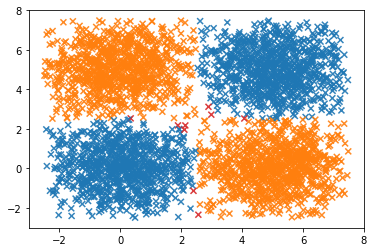

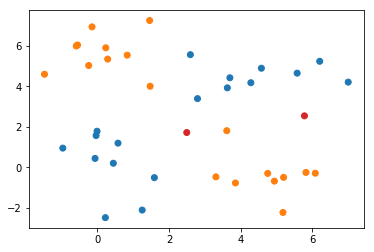

In [28]:
# my 1-layer neural network
n_neurons = 10
W_in = np.random.random((2,n_neurons)) 
b_in = np.random.random(n_neurons)
W_out = np.random.random((n_neurons,1))
b_out = np.random.random(1)

X_norm = (X - np.mean(X)) / np.std(X)
Xnew_norm = (Xnew - np.mean(Xnew)) / np.std(Xnew)

#################################
######### LEARNING RATE #########
learning_rate = 0.1
#################################

n_epoch = 200 # smaller learning rate means we will need more epochs
for e in range(n_epoch):
    error_rate = 0
    
    #################################
    ######### RANDOMIZATION #########
    randomize = np.arange(len(X_norm))
    np.random.shuffle(randomize)
    X_rand = X_norm[randomize]
    C_rand = C[randomize]
    #################################
    
    for n in range(len(X)):
        x = X_rand[n]
        x = np.expand_dims(x, axis=0) 
        l_in = np.dot(x, W_in)+b_in
        h = sigmoid(l_in) 
        l_out = np.dot(h, W_out)+b_out
        y = sigmoid(l_out)
        error = C_rand[n] - y
        error_rate += error**2
        y_delta = error * sigmoid(l_out, derivative=True) 
        h_delta = np.dot(y_delta,W_out.T) * sigmoid(l_in, derivative=True)
        
        #################################
        ### UPDATE WITH LEARNING RATE ###
        W_out += learning_rate * np.dot(h.T, y_delta)
        b_out += learning_rate * y_delta.squeeze()
        W_in += learning_rate * np.dot(x.T, h_delta)
        b_in += learning_rate * h_delta.squeeze()
        #################################
    if e%10 == 0:
        print("epoch:", e, "error:", error_rate/len(X))
    else :
        print("epoch:", e, "error:", error_rate/len(X), end="\r")

# plot the results 
pred_C = []
for n in range(len(Xnew)):
    x = Xnew_norm[n]
    h = sigmoid(np.dot(x, W_in)+b_in)
    y = sigmoid(np.dot(h, W_out)+b_out)
    pred_C.append(y)
pred_color = ["tab:orange" if p>=0.5 else "tab:blue" for p in pred_C ]

rw_pred_color = [pc if int(p>=0.5) == c  else "tab:red" for pc, p, c in zip(pred_color, pred_C, Cnew) ]

learned_C = []
for n in range(len(X)):
    x = X_norm[n]
    h = sigmoid(np.dot(x, W_in)+b_in)
    y = sigmoid(np.dot(h, W_out)+b_out)
    learned_C.append(y)
learned_color = ["tab:orange" if p>=0.5 else "tab:blue" for p in learned_C ]
rw_learned_color = [pc if int(p>=0.5) == c else "tab:red" for pc, p, c in zip(learned_color, learned_C, C) ]

plt.scatter(X[:,0], X[:,1], marker='x' ,c=rw_learned_color, alpha=0.9)
plt.show()
plt.scatter(Xnew[:,0], Xnew[:,1] ,c=rw_pred_color)
plt.show()

# Better ! 
## 1-hidden Layer Neural Networks has been proven to work

**Cybenko 1989**: Universal approximation theorem

<p style="width:100px;"><center><i> A feed-forward network with a single hidden layer (Shallow Neural network or SNN) containing a finite number of neurons $N$, can approximate any continuous functions on compact subsets of $\mathbb{R}^n$</i></center></p>


So, theorically we should be able do solve perfectly our problem by using only one hidden layer!
But:
- We don't know how many neurons are needed 
- We don't know which meta-parameters will help us
- It could take a long time to train


# One day, someone said

<img src="./img/wntgd.png" width="500" />

# Multi-layer Neural Network
Now that we have the learning algorithm for a one-hidden layer neural network, we can expend it to a N-hidden layer neural network. 

For instance let's try this one:

<img src="./img/mlnn.png" width="500" />

Now it's getting complex... 

Even arch to write! Look, the output $y$ can be written as :

$$ y = \varphi ( W_{3}^T .\varphi ( W_{2}^T . (\varphi (W_{1}^T . x + b_1) ) + b_2 ) +b_3 ) $$ 

- First layer : 4 neurons
- Second layer : 7 neurons
- Third layer : 5 neurons

----------------------------
### Learning procedure:
OKAY... we have now three layers .... learning algorithm is now :

> For each couple of *dot*/*color* ($\mathbf{x}$, $c$) of our dataset :
>> 1. We compute the output of our AN:
$$s_{1} = W_{1}.\mathbf{x} +b_{1} $$
$$h_{1} = \varphi ( s_{1}  ) $$
$$s_{2} = W_{2}.h_{1} +b_{2} $$
$$h_{2} = \varphi ( s_{2}  ) $$
$$s_{3} = W_{3}.h_{2} +b_{3} $$
$$h_{3} = \varphi ( s_{3}  ) $$
$$s_{out} = W_{out}.s_{3} +b_{out} $$
$$y = \varphi ( s_{out} ) $$
>> 2. We measure the error between the *expected output* $c$ and $y$:
$$ \mathcal{E} = c - y $$
>> 3. We compute the error due to the weights
$$ \delta_{out} = \mathcal{E} \times \varphi'(s_{out}) $$
$$ \delta_{3} = \delta_{out}^T.W_{out}  \times \varphi'(s_{3}) $$
$$ \delta_{2} = \delta_{3}^T.W_{3}  \times \varphi'(s_{2}) $$
$$ \delta_{1} = \delta_{2}^T.W_{2}  \times \varphi'(s_{1}) $$

>> 3. we update the weights:       
$$ W_{out} =  W_{out} + \eta. h_{3}^T. \delta_{out} $$
$$ b_{out} =  b_{out} + \eta. \delta_{out} $$
$$ W_{3} =  W_{3} + \eta. h_{2}^T. \delta_{3} $$
$$ b_{3} =  b_{3} + \eta. \delta_{3} $$
$$ W_{2} =  W_{2} + \eta. h_{1}^T. \delta_{2} $$
$$ b_{2} =  b_{2} + \eta. \delta_{2} $$
$$ W_{1} =  W_{1} + \eta. x^T. \delta_{1} $$
$$ b_{1} =  b_{1} + \eta. \delta_{1} $$


In [29]:
# 3-layer neural network definition 
n_in = 2
n_l1 = 4
n_l2 = 7
n_l3 = 5
n_out = 1

W1 = np.random.random((n_in,n_l1)) 
b1 = np.random.random(n_l1)

W2 = np.random.random((n_l1,n_l2))
b2 = np.random.random(n_l2)

W3 = np.random.random((n_l2,n_l3))
b3 = np.random.random(n_l3)

Wout = np.random.random((n_l3,n_out))
bout = np.random.random(n_out)

# normalization of the data (as always)
X_norm = (X - np.mean(X)) / np.std(X)
Xnew_norm = (Xnew - np.mean(Xnew)) / np.std(Xnew)



# here we define our learning rate ! 
learning_rate = 1
n_epoch = 500
for e in range(n_epoch):
    error_rate = 0
    
    #################################
    ######### RANDOMIZATION #########
    randomize = np.arange(len(X_norm))
    np.random.shuffle(randomize)
    X_rand = X_norm[randomize]
    C_rand = C[randomize]
    #################################
    
    for n in range(len(X)):
        x = X_rand[n]
        x = np.expand_dims(x, axis=0) # a little trick here
        # we compute the outputs of the first layer
        l1 = np.dot(x, W1)+b1
        h1 = sigmoid(l1) 
        l2 = np.dot(h1, W2)+b2
        h2 = sigmoid(l2) 
        l3 = np.dot(h2, W3)+b3
        h3 = sigmoid(l3) 
        lout = np.dot(h3, Wout)+bout
        y = sigmoid(lout) 
        # we compute the error
        error = C_rand[n] - y
        error_rate += error**2
        # we compute the delta for each layer
        ## first the delta between 
        delta_y = error * sigmoid(lout, derivative=True) 
        delta_h3 = np.dot(delta_y,Wout.T) * sigmoid(l3, derivative=True)
        delta_h2 = np.dot(delta_h3,W3.T) * sigmoid(l2, derivative=True)
        delta_h1 = np.dot(delta_h2,W2.T) * sigmoid(l1, derivative=True)

        Wout += learning_rate * np.dot(h3.T, delta_y)
        bout += learning_rate * delta_y.squeeze()
        W3 += learning_rate * np.dot(h2.T, delta_h3)
        b3 += learning_rate * delta_h3.squeeze()
        W2 += learning_rate * np.dot(h1.T, delta_h2)
        b2 += learning_rate * delta_h2.squeeze()
        W1 += learning_rate * np.dot(x.T, delta_h1)
        b1 += learning_rate * delta_h1.squeeze()
        
    if e%100 == 0:
        print("epoch:", e, "error:", error_rate/len(X))
        #let's update the learning_rate 
        learning_rate *= 0.5
    else :
        print("epoch:", e, "error:", error_rate/len(X), end="\r")

epoch: 0 error: [[0.26602024]]
epoch: 100 error: [[0.00064802]]
epoch: 200 error: [[0.00044574]]05]]
epoch: 300 error: [[3.08749717e-05]]
epoch: 400 error: [[2.40302814e-05]]


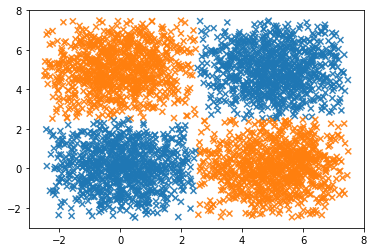

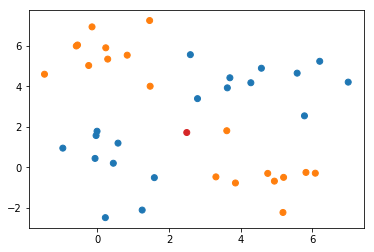

In [30]:
pred_C = []
for n in range(len(Xnew)):
    x = Xnew_norm[n]
    l1 = sigmoid(np.dot(x, W1)+b1)
    l2 = sigmoid(np.dot(l1, W2)+b2)
    l3 = sigmoid(np.dot(l2, W3)+b3)
    y = sigmoid(np.dot(l3, Wout)+bout)
    pred_C.append(y)
pred_color = ["tab:orange" if p>=0.5 else "tab:blue" for p in pred_C ]

rw_pred_color = [pc if int(p>=0.5) == c  else "tab:red" for pc, p, c in zip(pred_color, pred_C, Cnew) ]

learned_C = []
for n in range(len(X)):
    x = X_norm[n]
    l1 = sigmoid(np.dot(x, W1)+b1)
    l2 = sigmoid(np.dot(l1, W2)+b2)
    l3 = sigmoid(np.dot(l2, W3)+b3)
    y = sigmoid(np.dot(l3, Wout)+bout)
    learned_C.append(y)
learned_color = ["tab:orange" if p>=0.5 else "tab:blue" for p in learned_C ]
rw_learned_color = [pc if int(p>=0.5) == c else "tab:red" for pc, p, c in zip(learned_color, learned_C, C) ]

plt.scatter(X[:,0], X[:,1], marker='x' ,c=rw_learned_color, alpha=0.9)
plt.show()
plt.scatter(Xnew[:,0], Xnew[:,1] ,c=rw_pred_color)
plt.show()

# Et voilà :D

---------------------------

# 3 - Deep Neural Network

Now that we undersatnd more deeply what is a neural network, let study what constitute a **DEEP** neural network (DNN)...

Basically, a DNN is simply an Artificial Neural Network (ANN) with more layers. 

```
Usually in DNN : 
Depth of a DNN : the number of layers
Width od a DNN : the number of neurons in a layer
```

Briefly, classical machine-learning algorithms are based on learning regression/classification using the input/feature/output paradigm as:
```
input -> |Transformation| -> features
features -> |M-L algorithm| -> output
```

Searchers just realized that DNN where able to handle directly inputs (even high-dimensional ones such as images) and perform the features extraction internally withotu having to define them. 

```
input -> |DNN| -> output
```



In [2]:
###################################
########## LOADING MNIST ##########
###################################
import os # <- here I cheat : I add a library XD
import urllib
def download_mnist(path):
    key_file = {
        'train_img':'train-images-idx3-ubyte.gz',
        'train_label':'train-labels-idx1-ubyte.gz',
        'test_img':'t10k-images-idx3-ubyte.gz',
        'test_label':'t10k-labels-idx1-ubyte.gz'
    }
    for v in key_file.values():
        if not os.path.exists(path+"/"+v):
            if not os.path.exists(path):
                os.mkdir(path)
            print("Downloading " + v + " ... ")
            urllib.request.urlretrieve('http://yann.lecun.com/exdb/mnist/' + v, path+"/"+v)
            print("Done.")
def load_mnist(path, kind='train', normalize=True):
    import os
    import gzip
    import numpy as np
    
    download_mnist(path)
    
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)
    
    return images, labels

In [3]:
x_train, t_train = load_mnist("./mnist", kind="train")
x_test, t_test = load_mnist("./mnist", kind="t10k")

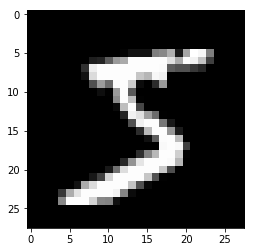

5 1.0 0.0


In [5]:
img = x_train[0]/255
label = t_train[0]
plt.imshow(img.reshape(28,28), cmap="gray")
plt.show()
print(label, np.max(img), np.min(img))

In [49]:
def softmax(X):
    res = []
    if X.ndim > 1:
        for i in range(len(X)):
            exps = np.exp(X[i] - np.max(X[i]))
            res.append(exps / np.sum(exps))
    else:
        res = np.exp(X - np.max(X))
    return np.array(res)

def cross_entropy(y,t):
    """
    X is the output from fully connected layer (num_examples x num_classes)
    y is labels (num_examples x 1)
    	Note that y is not one-hot encoded vector. 
    	It can be computed as y.argmax(axis=1) from one-hot encoded vectors of labels if required.
    """
    m = t.shape[0]
    # We use multidimensional array indexing to extract 
    # softmax probability of the correct label for each sample.
    # Refer to https://docs.scipy.org/doc/numpy/user/basics.indexing.html#indexing-multi-dimensional-arrays for understanding multidimensional array indexing.
    log_likelihood = -np.log(y[range(m),t])
    loss = np.sum(log_likelihood) / m
    return loss

def delta_cross_entropy(y,t):
    """
    X is the output from fully connected layer (num_examples x num_classes)
    y is labels (num_examples x 1)
    	Note that y is not one-hot encoded vector. 
    	It can be computed as y.argmax(axis=1) from one-hot encoded vectors of labels if required.
    """
    m = t.shape[0]
    grad = softmax(y)
    grad[range(m),t] -= 1
    grad = grad/m
    return grad


In [52]:
n_in = 28*28
n_l1 = 16
n_l2 = 16
n_l3 = 16
n_out = 10

W1 = np.random.random((n_in,n_l1)) 
b1 = np.random.random(n_l1)

W2 = np.random.random((n_l1,n_l2))
b2 = np.random.random(n_l2)

W3 = np.random.random((n_l2,n_l3))
b3 = np.random.random(n_l3)

Wout = np.random.random((n_l3,n_out))
bout = np.random.random(n_out)

###############################
########## BATCH SIZE #########
###############################
batch_size = 20

learning_rate = 1
n_epoch = 100
for e in range(n_epoch):
    
    # RANDOMIZATION
    #randomize = np.arange(len(x_train))
    #np.random.shuffle(randomize)
    #x_train = x_train[randomize]
    #t_train = t_train[randomize]
    
    error_rate = 0
    acc = 0
    n_batch=0
    
    for n in range(int(len(x_train)/batch_size)):    
        x = x_train[n*batch_size:n*batch_size+batch_size]
        x = (x - np.mean(x))/np.std(x)
        t = t_train[n*batch_size:n*batch_size+batch_size]
        #t = t.argmax(axis=1)
        
        n_batch += 1
        #x = np.expand_dims(x, axis=0) # a little trick here
        #x = np.expand_dims(x, axis=0) # a little trick here
        # we compute the outputs of the first layer
        l1 = np.dot(x, W1)+b1
        h1 = sigmoid(l1) 
        l2 = np.dot(h1, W2)+b2
        h2 = sigmoid(l2) 
        l3 = np.dot(h2, W3)+b3
        h3 = sigmoid(l3) 
        lout = np.dot(h3, Wout)+bout
        y = softmax(lout)
        # we compute the error
        
        error = cross_entropy(y, t)
        #error = np.sum(t - y)
        error_rate += error
        #print(t, np.argmax(y,axis=1))
        acc += np.sum(t == np.argmax(y,axis=1))/len(t)
        #print("epoch:", e, n, "error:", "{:1.5f}".format(error), end="\r")
        #print(Wout.shape, h3.shape)
        # we compute the delta for each layer
        ## first the delta between 
        delta_y = -delta_cross_entropy(lout, t)
        delta_h3 = np.dot(delta_y,Wout.T) * sigmoid(l3, derivative=True)
        delta_h2 = np.dot(delta_h3,W3.T) * sigmoid(l2, derivative=True)
        delta_h1 = np.dot(delta_h2,W2.T) * sigmoid(l1, derivative=True)

        Wout += learning_rate * np.dot(h3.T, delta_y)
        bout += learning_rate * np.mean(delta_y, axis=0)
        W3 += learning_rate * np.dot(h2.T, delta_h3)
        b3 += learning_rate * np.mean(delta_h3, axis=0)
        W2 += learning_rate * np.dot(h1.T, delta_h2)
        b2 += learning_rate * np.mean(delta_h2, axis=0)
        W1 += learning_rate * np.dot(x.T, delta_h1)
        b1 += learning_rate * np.mean(delta_h1, axis=0)
        
    if e%10 == 0:
        print("epoch:", "{:5}".format(e), "error:", "{:0.6f}".format(error_rate/n_batch), "{:0.2f}".format(acc/n_batch))
        #let's update the learning_rate 
        learning_rate *= 0.5
    else :
        print("epoch:", "{:5}".format(e), "error:", "{:0.6f}".format(error_rate/n_batch), "{:0.2f}".format(acc/n_batch), end="\r")



epoch:     0 error: 2.168013 0.20
epoch:    10 error: 0.309182 0.92
epoch:    20 error: 0.230806 0.94
epoch:    30 error: 0.196138 0.95
epoch:    40 error: 0.184206 0.95
epoch:    50 error: 0.180081 0.95
epoch:    60 error: 0.178117 0.95
epoch:    70 error: 0.177040 0.95
epoch:    80 error: 0.176382 0.95
epoch:    90 error: 0.176021 0.95


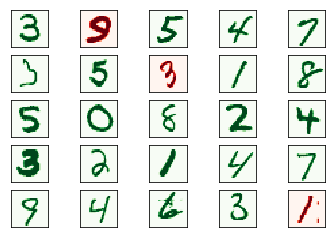

accuracy on test set: 90.36999999999999 %


In [54]:
randomize = np.arange(len(x_test))
np.random.shuffle(randomize)
x_test = x_test[randomize]
t_test = t_test[randomize]
f, axarr = plt.subplots(5, 5)
objarr = np.empty_like(axarr)

for n, ax in enumerate(axarr.flat):
    x = x_test[n]
    x = (x - np.mean(x))/np.std(x)
    t = t_test[n]
    h1 = sigmoid(np.dot(x, W1)+b1) 
    h2 = sigmoid(np.dot(h1, W2)+b2) 
    h3 = sigmoid(np.dot(h2, W3)+b3) 
    lout = np.dot(h3, Wout)+bout
    y = softmax(lout)
    tp = np.argmax(y)
    c = 'Greens' if t==tp else 'Reds'
    objarr.flat[n] = ax.imshow(x.reshape(28,28), cmap=c)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
plt.show(block=False)

## measure the accuracy on the test set
acc_test = 0.0
for n in range(len(x_test)):
    x = x_test[n]
    x = (x - np.mean(x))/np.std(x)
    t = t_test[n]
    h1 = sigmoid(np.dot(x, W1)+b1) 
    h2 = sigmoid(np.dot(h1, W2)+b2) 
    h3 = sigmoid(np.dot(h2, W3)+b3) 
    lout = np.dot(h3, Wout)+bout
    y = softmax(lout)
    tp = np.argmax(y)
    acc_test += int(t==tp)
    #print("predicted:", labels[tp], "- result:", t==tp, end="\r")
acc_test /= len(x_test)
print("accuracy on test set:", 100*acc_test, "%")

## Our 3-layers NN work's pretty well :)

# Fashion_MNIST : a **GLORIOUS** dataset 

```
because mnist is too easy, you know ...
```

In [6]:
def download_fashion_mnist(path):
    key_file = {
        'train_img':'train-images-idx3-ubyte.gz',
        'train_label':'train-labels-idx1-ubyte.gz',
        'test_img':'t10k-images-idx3-ubyte.gz',
        'test_label':'t10k-labels-idx1-ubyte.gz'
    }
    for v in key_file.values():
        if not os.path.exists(path+"/"+v):
            if not os.path.exists(path):
                os.mkdir(path)
            print("Downloading " + v + " ... ")
            urllib.request.urlretrieve('http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/' + v, path+"/"+v)
            print("Done.")
            
def load_fashion_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    
    download_fashion_mnist(path)
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [7]:
labels = ["T-shirt/top", "Trouser","Pullover", "Dress", "Coat", "Sandal", "Shirt","Sneaker","Bag", "Ankle boot"]
x_train, t_train = load_fashion_mnist('./fashion_mnist', kind='train')
x_test, t_test = load_fashion_mnist('./fashion_mnist', kind='t10k')

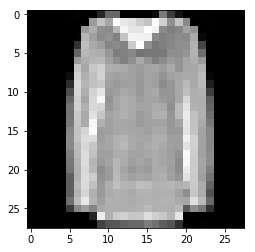

Pullover


In [8]:
n = np.random.randint(low=0, high=len(x_train))
img = x_train[n]/255
label = t_train[n]
plt.imshow(img.reshape(28,28), cmap="gray")
plt.show()
print(labels[label])

In [348]:
n_in = 28*28
n_l1 = 32
n_l2 = 32
n_l3 = 32
n_out = 10

W1 = np.random.random((n_in,n_l1)) 
b1 = np.random.random(n_l1)

W2 = np.random.random((n_l1,n_l2))
b2 = np.random.random(n_l2)

W3 = np.random.random((n_l2,n_l3))
b3 = np.random.random(n_l3)

Wout = np.random.random((n_l3,n_out))
bout = np.random.random(n_out)

###############################
########## BATCH SIZE #########
###############################
batch_size = 20

learning_rate = 1
n_epoch = 200
for e in range(n_epoch):
    
    # RANDOMIZATION
    randomize = np.arange(len(x_train))
    np.random.shuffle(randomize)
    x_train = x_train[randomize]
    t_train = t_train[randomize]
    
    error_rate = 0
    acc = 0
    n_batch=0
    
    for n in range(int(len(x_train)/batch_size)):    
        x = x_train[n*batch_size:n*batch_size+batch_size]
        x = (x - np.mean(x))/np.std(x)
        t = t_train[n*batch_size:n*batch_size+batch_size]
        
        n_batch += 1
        #x = np.expand_dims(x, axis=0) # a little trick here
        #x = np.expand_dims(x, axis=0) # a little trick here
        # we compute the outputs of the first layer
        l1 = np.dot(x, W1)+b1
        h1 = sigmoid(l1) 
        l2 = np.dot(h1, W2)+b2
        h2 = sigmoid(l2) 
        l3 = np.dot(h2, W3)+b3
        h3 = sigmoid(l3) 
        lout = np.dot(h3, Wout)+bout
        y = softmax(lout)
        # we compute the error
        
        error = cross_entropy(y, t)
        #error = np.sum(t - y)
        error_rate += error
        #print(t, np.argmax(y,axis=1))
        acc += np.sum(t == np.argmax(y,axis=1))/len(t)
        #print("epoch:", e, n, "error:", "{:1.5f}".format(error), end="\r")
        #print(Wout.shape, h3.shape)
        # we compute the delta for each layer
        ## first the delta between 
        delta_y = -delta_cross_entropy(lout, t)
        delta_h3 = np.dot(delta_y,Wout.T) * sigmoid(l3, derivative=True)
        delta_h2 = np.dot(delta_h3,W3.T) * sigmoid(l2, derivative=True)
        delta_h1 = np.dot(delta_h2,W2.T) * sigmoid(l1, derivative=True)

        Wout += learning_rate * np.dot(h3.T, delta_y)
        bout += learning_rate * np.mean(delta_y, axis=0)
        W3 += learning_rate * np.dot(h2.T, delta_h3)
        b3 += learning_rate * np.mean(delta_h3, axis=0)
        W2 += learning_rate * np.dot(h1.T, delta_h2)
        b2 += learning_rate * np.mean(delta_h2, axis=0)
        W1 += learning_rate * np.dot(x.T, delta_h1)
        b1 += learning_rate * np.mean(delta_h1, axis=0)
        
    if e%20 == 0:
        print("epoch:", "{:5}".format(e), "error:", "{:0.6f}".format(error_rate/n_batch), "{:0.2f}".format(acc/n_batch))
        #let's update the learning_rate 
        learning_rate *= 0.5
    else :
        print("epoch:", "{:5}".format(e), "error:", "{:0.6f}".format(error_rate/n_batch), "{:0.2f}".format(acc/n_batch), end="\r")


epoch:     0 error: 10.312243 0.10
epoch:    20 error: 0.565388 0.80
epoch:    40 error: 0.426590 0.85
epoch:    60 error: 0.382577 0.87
epoch:    80 error: 0.363429 0.87
epoch:   100 error: 0.354867 0.88
epoch:   120 error: 0.351813 0.88
epoch:   140 error: 0.348793 0.88
epoch:   160 error: 0.347219 0.88
epoch:   180 error: 0.345842 0.88


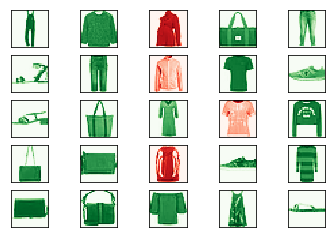

In [352]:
randomize = np.arange(len(x_test))
np.random.shuffle(randomize)
x_test = x_test[randomize]
t_test = t_test[randomize]
f, axarr = plt.subplots(5, 5)
objarr = np.empty_like(axarr)

for n, ax in enumerate(axarr.flat):
    x = x_test[n]
    x = (x - np.mean(x))/np.std(x)
    t = t_test[n]
    h1 = sigmoid(np.dot(x, W1)+b1) 
    h2 = sigmoid(np.dot(h1, W2)+b2) 
    h3 = sigmoid(np.dot(h2, W3)+b3) 
    lout = np.dot(h3, Wout)+bout
    y = softmax(lout)
    tp = np.argmax(y)
    c = 'Greens' if t==tp else 'Reds'
    objarr.flat[n] = ax.imshow(x.reshape(28,28), cmap=c)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
plt.show(block=False)

In [350]:
acc_test = 0.0
for n in range(len(x_test)):
    x = x_test[n]
    x = (x - np.mean(x))/np.std(x)
    t = t_test[n]
    h1 = sigmoid(np.dot(x, W1)+b1) 
    h2 = sigmoid(np.dot(h1, W2)+b2) 
    h3 = sigmoid(np.dot(h2, W3)+b3) 
    lout = np.dot(h3, Wout)+bout
    y = softmax(lout)
    tp = np.argmax(y)
    acc_test += int(t==tp)
    #print("predicted:", labels[tp], "- result:", t==tp, end="\r")
acc_test /= len(x_test)
print("accuracy on test set:", 100*acc_test, "%")

accuracy on test set: 80.88 %


In [ ]:
import csv
lbl_train = []
img_train = []
with open("./sign_mnist_train.csv", "r") as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)
    for row in csvreader:
        #print(row[0], len(row[1:]))
        lbl_train.append(int(row[0]))
        img_train.append(np.array(row[1:]).astype(uint8))


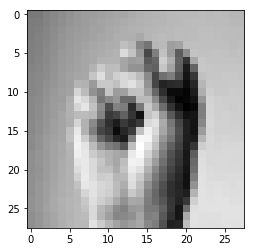

18 24 [3, 6, 2, 2, 13, 16, 8, 22, 3, 3, 18, 10]


In [15]:
n = np.random.randint(low=0, high=len(img_train))
plt.imshow(img_train[n].reshape(28,28), cmap="gray")
plt.show()
print(lbl_train[n], np.max(lbl_train), lbl_train[0:12])

In [22]:
import pickle, gzip

sign_mnist_train = "train-images-idx3-ubyte.gz"
pickle.dump( lbl_train, gzip.open( "save_lbl.gz", "wb" ), protocol= 2)

In [39]:
n_in = 28*28
n_l1 = 128
n_l2 = 128
n_l3 = 128
n_out = 25

W1 = np.random.random((n_in,n_l1)) 
b1 = np.random.random(n_l1)

W2 = np.random.random((n_l1,n_l2))
b2 = np.random.random(n_l2)

W3 = np.random.random((n_l2,n_l3))
b3 = np.random.random(n_l3)

Wout = np.random.random((n_l3,n_out))
bout = np.random.random(n_out)

###############################
########## BATCH SIZE #########
###############################
batch_size = 20

learning_rate = 1
n_epoch = 200
for e in range(n_epoch):
    
    # RANDOMIZATION
    randomize = np.arange(len(img_train))
    np.random.shuffle(randomize)
    img_train = img_train[randomize]
    lbl_train = lbl_train[randomize]
    
    error_rate = 0
    acc = 0
    n_batch=0
    
    for n in range(int(len(img_train)/batch_size)):    
        x = img_train[n*batch_size:n*batch_size+batch_size]
        x = (x - np.mean(x))/np.std(x)
        t = np.array(lbl_train[n*batch_size:n*batch_size+batch_size])
        
        #t = t.argmax(axis=1)
        
        n_batch += 1
        #x = np.expand_dims(x, axis=0) # a little trick here
        #x = np.expand_dims(x, axis=0) # a little trick here
        # we compute the outputs of the first layer
        l1 = np.dot(x, W1)+b1
        h1 = sigmoid(l1) 
        l2 = np.dot(h1, W2)+b2
        h2 = sigmoid(l2) 
        l3 = np.dot(h2, W3)+b3
        h3 = sigmoid(l3) 
        lout = np.dot(h3, Wout)+bout
        y = softmax(lout)
        # we compute the error
        #print(y.shape, np.argmax(y,axis=1).shape, t.shape)
        error = cross_entropy(y, t)
        #error = np.sum(t - y)
        error_rate += error
        #print(t, np.argmax(y,axis=1))
        acc += np.sum(t == np.argmax(y,axis=1))/len(t)
        #print("epoch:", e, n, "error:", "{:1.5f}".format(error), end="\r")
        #print(Wout.shape, h3.shape)
        # we compute the delta for each layer
        ## first the delta between 
        delta_y = -delta_cross_entropy(lout, t)
        delta_h3 = np.dot(delta_y,Wout.T) * sigmoid(l3, derivative=True)
        delta_h2 = np.dot(delta_h3,W3.T) * sigmoid(l2, derivative=True)
        delta_h1 = np.dot(delta_h2,W2.T) * sigmoid(l1, derivative=True)

        Wout += learning_rate * np.dot(h3.T, delta_y)
        bout += learning_rate * np.mean(delta_y, axis=0)
        W3 += learning_rate * np.dot(h2.T, delta_h3)
        b3 += learning_rate * np.mean(delta_h3, axis=0)
        W2 += learning_rate * np.dot(h1.T, delta_h2)
        b2 += learning_rate * np.mean(delta_h2, axis=0)
        W1 += learning_rate * np.dot(x.T, delta_h1)
        b1 += learning_rate * np.mean(delta_h1, axis=0)
        
    if e%20 == 0:
        print("epoch:", "{:5}".format(e), "error:", "{:0.6f}".format(error_rate/n_batch), "{:0.2f}".format(acc/n_batch))
        #let's update the learning_rate 
        learning_rate *= 0.5
    else :
        print("epoch:", "{:5}".format(e), "error:", "{:0.6f}".format(error_rate/n_batch), "{:0.2f}".format(acc/n_batch), end="\r")


    

TypeError: only integer scalar arrays can be converted to a scalar index